# Linear Regression ex1

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
path = os.getcwd() + '/ex1/ex1data1.txt' 
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() #prints out the top 5

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe() #calculate some basic statistics on the data set

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Visualizing the data

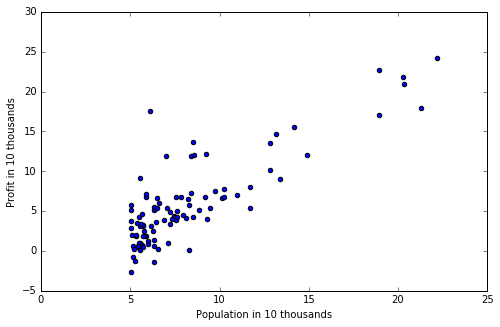

In [4]:
graph = data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))
graph.set_xlabel('Population in 10 thousands')
graph.set_ylabel('Profit in 10 thousands')

## Algorithm

#### Hypothesis Function

Note that this is like the equation of a straight line. We give to hθ(x) values for θ0 and θ1 to get our estimated output yˆ. In other words, we are trying to create a function called hθ that is trying to map our input data (the x's) to our output data (the y's).

<img src="imgs/hypothesis.png" width="300">

#### Cost Function

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's compared to the actual output y's.

<img src="imgs/costfunction.png" width="300">

In [5]:
#X = input matrix, Y = output matrix, theta = hypothesis function

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2) #compute for each element in X
    return np.sum(inner) / (2 * len(X))

#theta.T returns transpose of the matrix

In [6]:
#add dimension 1 for θ0
#DataFrame.insert(loc, column, value, allow_duplicates=False)

data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)

cols = data.shape[1] #data.shape return (no of row, no of column)
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
# convert from data frames to numpy matrices

X = np.matrix(X.values) #returns [[1, population]]
u = np.matrix(y.values) #returns [[profit]]
theta = np.matrix(np.array([0,0])) #returns matrix [[0 0]] 

In [8]:
computeCost(X, y, theta) #testing computeCost function

32.072733877455676

#### Gradient Descent

So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in hypothesis function. That's where gradient descent comes in.

Imagine that we graph our hypothesis function based on its fields θ0 and θ1 (actually we are graphing the cost function as a function of the parameter estimates). This can be kind of confusing; we are moving up to a higher level of abstraction. We are not graphing x and y itself, but the parameter range of our hypothesis function and the cost resulting from selecting particular set of parameters.

We put θ0 on the x axis and θ1 on the y axis, with the cost function on the vertical z axis. The points on our graph will be the result of the cost function using our hypothesis with those specific theta parameters.

We will know that we have succeeded when our cost function is at the very bottom of the pits in our graph, i.e. when its value is the minimum.

The way we do this is by taking the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent, and the size of each step is determined by the parameter α, which is called the learning rate.


<img src="imgs/gradientdescent.png" width="500">

###### Visualizing Gradient Descent

<img src="imgs/gradientdescent.gif" width="600">

###### Implementation

In [9]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) #ravel returns flatten matrix
    cost = np.zeros(iters)
        
    for i in range(iters):
        error = (X * theta.T) - y
                
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
                
    return theta, cost

In [10]:
# initialize variables for learning rate and iterations

alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [11]:
computeCost(X,y,g)

4.5159555030789118

#### Viewing Results

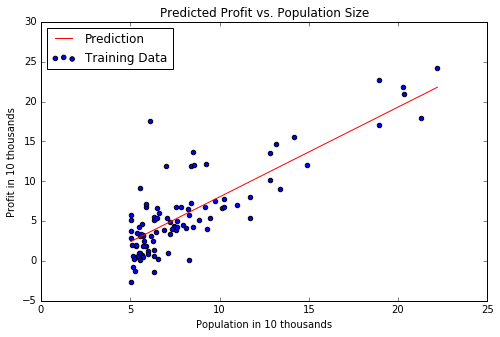

In [12]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population in 10 thousands')
ax.set_ylabel('Profit in 10 thousands')
ax.set_title('Predicted Profit vs. Population Size')

You can see here that if the population is 10, you can predict the profit to be between 5-10.

We can also plot our gradient descent

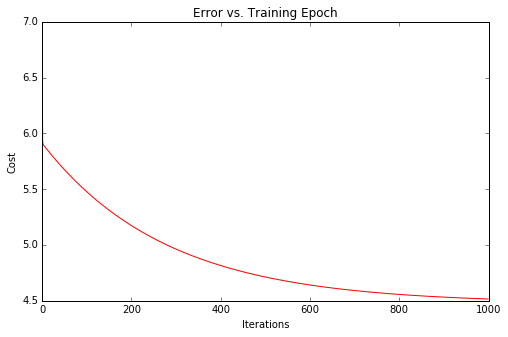

In [13]:
fig, ax = plt.subplots(figsize=(8,5))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

Nice! We see that our cost function is always decreasing which is what we are looking for. If you increase the iteration by a multitude of ten, you will see that it will converge around 4.5

Sources:

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/ <== for the code

https://share.coursera.org/wiki/index.php/ML:Main <== for theory (coursera account required)
    